## *Home Loan Approval - Data Analysis and Classification Modelling*
#### WarriWes
#### 11 April 2018
  -----  

## Analytics Vidhya - Problem Statement
#### About Company
> Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

#### Problem
> Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')


train = pd.read_csv('C:\\Users\\Wesley\\OneDrive\\DocuFrom5_14_16\\Documents\\2018\\Portfolio_Construction\\Loan_data_vidhya\\loan_data_train.csv')
test = pd.read_csv('C:\\Users\\Wesley\\OneDrive\\DocuFrom5_14_16\\Documents\\2018\\Portfolio_Construction\\Loan_data_vidhya\\loan_data_test.csv')

In [2]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Notes:  
* Gender, Married, Education, Self_Employed, Loan_Status columns
  look like character values, while Credit_History seems to be displayed 
  in 1,0 dummy format  
* Loan_Amount_Term recorded as # of days  
* looks like we'll be dealing with some NaN values  

In [4]:
# For the sake of data exploration, analysis, and tidying, we'll merge the train and test sets for now
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train, test], ignore_index=True)
print(train.shape, test.shape, df.shape)

(614, 14) (367, 13) (981, 14)


In [5]:
# Summary stats for numerics
df.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [6]:
# Missing values in all columns
df.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

Note the decent number of null values.  
In Loan_Status, of course, the null values are from our test set.

In [7]:
# Print means, medians, and standard deviation of each column to check for spread and skewness
print(df.mean(axis=0))
print(df.median(axis=0))
print(df.std(axis=0))
# Difference between mean and median in each column
df.mean(axis=0) - df.median(axis=0)

ApplicantIncome      5179.795107
CoapplicantIncome    1601.916330
Credit_History          0.835920
LoanAmount            142.511530
Loan_Amount_Term      342.201873
dtype: float64
ApplicantIncome      3800.0
CoapplicantIncome    1110.0
Credit_History          1.0
LoanAmount            126.0
Loan_Amount_Term      360.0
dtype: float64
ApplicantIncome      5695.104533
CoapplicantIncome    2718.772806
Credit_History          0.370553
LoanAmount             77.421743
Loan_Amount_Term       65.100602
dtype: float64


ApplicantIncome      1379.795107
CoapplicantIncome     491.916330
Credit_History         -0.164080
LoanAmount             16.511530
Loan_Amount_Term      -17.798127
dtype: float64

In [8]:
# List column types
df.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
source                object
dtype: object

In [9]:
# Print frequencies of values for all categorical variables
categ_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
for col in categ_cols:
    print(df[col].value_counts(), '\n')

Male      775
Female    182
Name: Gender, dtype: int64 

Yes    631
No     347
Name: Married, dtype: int64 

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64 

Graduate        763
Not Graduate    218
Name: Education, dtype: int64 

No     807
Yes    119
Name: Self_Employed, dtype: int64 

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64 

1.0    754
0.0    148
Name: Credit_History, dtype: int64 

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64 



  -----  
### *Looking at numeric variable distributions*  
  
  

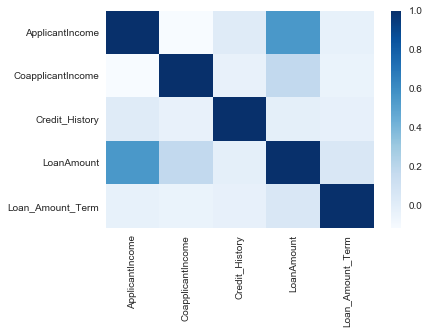

In [10]:
# Quick look at correlations:
corr = df.corr()
sns.heatmap(corr, cmap='Blues')
plt.show()

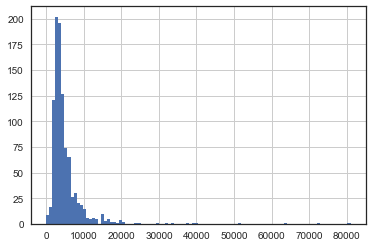

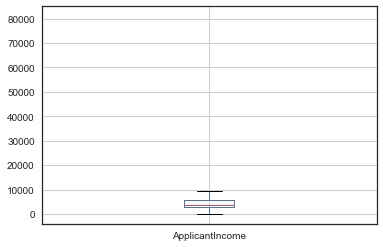

In [11]:
df['ApplicantIncome'].hist(bins=100)
plt.show()
df.boxplot(column = 'ApplicantIncome')
plt.show()

Note the extreme right skew, with just a few values between about 20,000 and 81,000

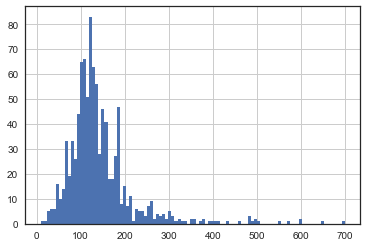

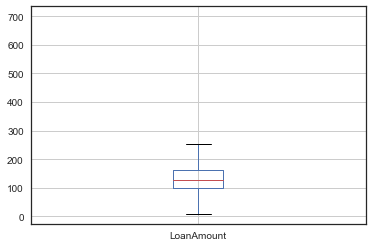

In [12]:
df['LoanAmount'].hist(bins=100)
plt.show()
df.boxplot(column = 'LoanAmount')
plt.show()

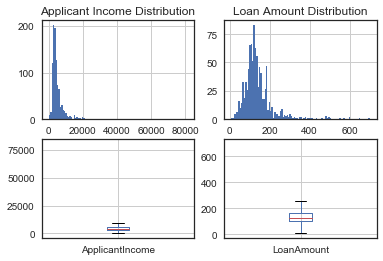

In [13]:
# We also have a nice right skew here, though not quite as extreme as in the ApplicantIncome distribution
plt.subplot(2, 2, 1)
df['ApplicantIncome'].hist(bins=100)
plt.title('Applicant Income Distribution')
plt.subplot(2, 2, 3)
df.boxplot(column='ApplicantIncome')
plt.subplot(2, 2, 2)
df['LoanAmount'].hist(bins=100)
plt.title('Loan Amount Distribution')
plt.subplot(2, 2, 4)
df.boxplot(column='LoanAmount')
plt.show()

 ##### Below, looking at Applicant Income distribution dependent on education,  
 ##### marital status, number of dependents, property area, and gender 
   

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


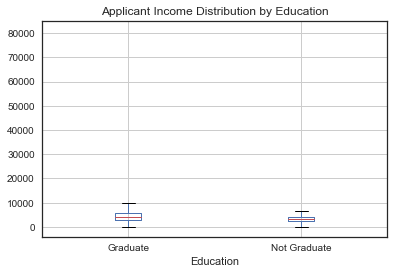

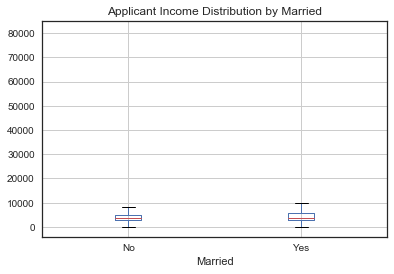

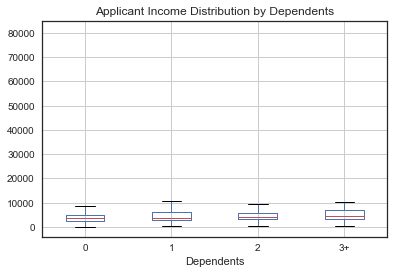

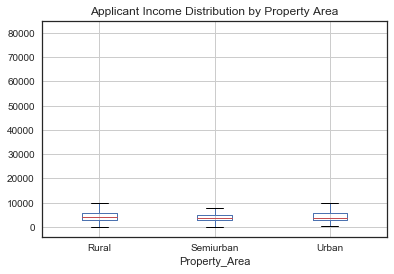

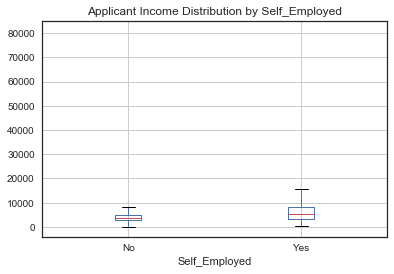

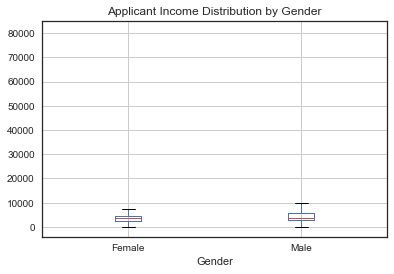

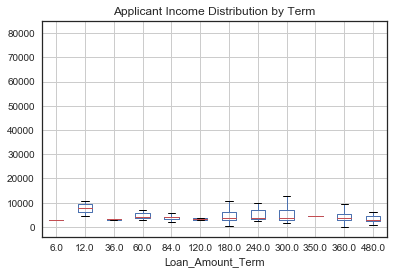

In [14]:
df.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')
plt.title('Applicant Income Distribution by Education')
plt.show()

df.boxplot(column='ApplicantIncome', by='Married')
plt.suptitle('')
plt.title('Applicant Income Distribution by Married')
plt.show()

df.boxplot(column='ApplicantIncome', by='Dependents')
plt.suptitle('')
plt.title('Applicant Income Distribution by Dependents')
plt.show()

df.boxplot(column='ApplicantIncome', by='Property_Area')
plt.suptitle('')
plt.title('Applicant Income Distribution by Property Area')
plt.show()

df.boxplot(column='ApplicantIncome', by='Self_Employed')
plt.suptitle('')
plt.title('Applicant Income Distribution by Self_Employed')
plt.show()

df.boxplot(column='ApplicantIncome', by='Gender')
plt.suptitle('')
plt.title('Applicant Income Distribution by Gender')
plt.show()

df.boxplot(column='ApplicantIncome', by='Loan_Amount_Term')
plt.suptitle('')
plt.title('Applicant Income Distribution by Term')
plt.show()

Comparing **income distribution** grouped by a few of the variables, we may consider that perhaps our extreme right skew merely reflects the income gap in society, in addition to chance with regard to the selected sample. It makes sense that college graduates would be more likely to make more, and education appears to be the greatest factor (of the variables we have to work with) in determining whether or not an applicant will have a high, outlier-grade income.  
  
**Marital status** is also worth looking at. Married applicants may be more likely to have a relatively stable financial situation (including credit history, etc.), considering that stability is often a prerequisite for those who decide to settle down and get hitched.  
  
**Self-employed** applicants also boast a generally higher IQR, although there aren't as many very high incomes, and let's remember that there are over 6 times as many non-self-employed applicants in this sample.  

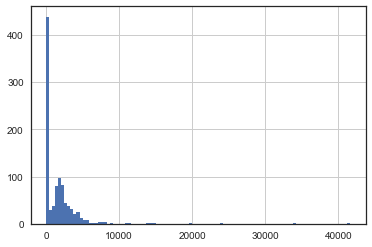

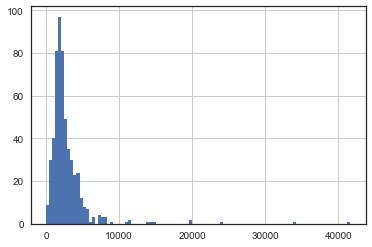

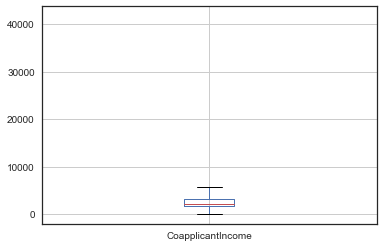

In [15]:
# Applicant and Coapplicant Income
df['CoapplicantIncome'].hist(bins=100)
plt.show()

# So yeah let's briefly change 0 values to null in order to get a better view of the distribution
df['CoapplicantIncome'] = df['CoapplicantIncome'].replace(0.0, np.nan)
df['CoapplicantIncome'].hist(bins=100)
plt.show()
df.boxplot(column = 'CoapplicantIncome')
plt.show()

In [16]:
# Also highly right skewed. Likely for the same general reasons as ApplicantIncome
# Change our null values back to 0s 
df['CoapplicantIncome'] = df['CoapplicantIncome'].replace(np.nan, 0.0)
# Let's check to see how the presence/absence of coapplicant income relates to marital status:
co_inc_tf = df.CoapplicantIncome > 0
print(df.pivot_table(index='Married', columns=co_inc_tf, values='Loan_ID', aggfunc='count'))
# Proportions
df.pivot_table(index='Married', columns=co_inc_tf, values='Loan_ID', aggfunc='count').apply(lambda x: x / df.Loan_ID.count())

CoapplicantIncome  False  True 
Married                        
No                   224    123
Yes                  203    428


CoapplicantIncome,False,True
Married,,
No,0.228338,0.125382
Yes,0.206932,0.436290


So *yes*, married applicants are definitely more likely to have a coapplicant's income included

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


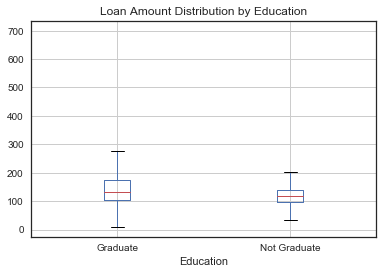

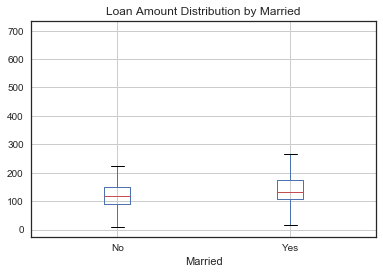

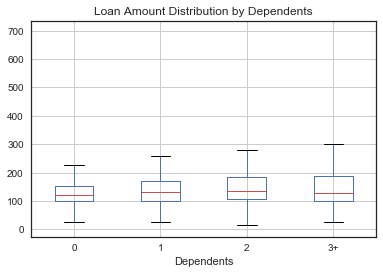

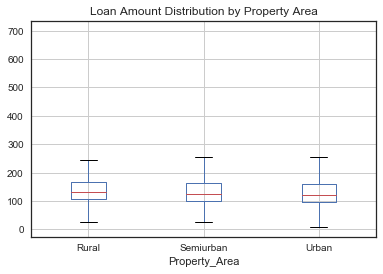

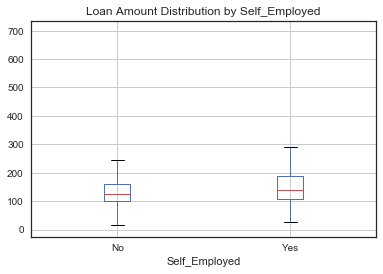

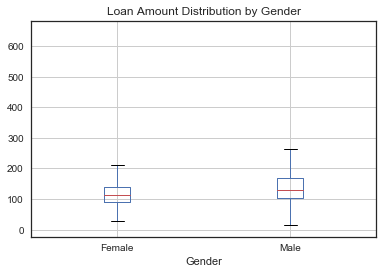

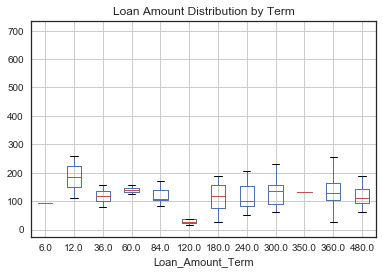

In [17]:
# Finally a quick look at Loan_Amount relationships. I expect to see 
# results similar to ApplicantIncome, as these variables were highly correlated,
# and further correlated to similar other variables

df.boxplot(column='LoanAmount', by='Education')
plt.suptitle('')
plt.title('Loan Amount Distribution by Education')
plt.show()

df.boxplot(column='LoanAmount', by='Married')
plt.suptitle('')
plt.title('Loan Amount Distribution by Married')
plt.show()

df.boxplot(column='LoanAmount', by='Dependents')
plt.suptitle('')
plt.title('Loan Amount Distribution by Dependents')
plt.show()

df.boxplot(column='LoanAmount', by='Property_Area')
plt.suptitle('')
plt.title('Loan Amount Distribution by Property Area')
plt.show()

df.boxplot(column='LoanAmount', by='Self_Employed')
plt.suptitle('')
plt.title('Loan Amount Distribution by Self_Employed')
plt.show()

df.boxplot(column='LoanAmount', by='Gender')
plt.suptitle('')
plt.title('Loan Amount Distribution by Gender')
plt.show()

df.boxplot(column='LoanAmount', by='Loan_Amount_Term')
plt.suptitle('')
plt.title('Loan Amount Distribution by Term')
plt.show()

  -----  
### *Categorical variable analysis*  
  

In [18]:
# Let's go ahead and map any binary variables to 1s for 'Yes' values and 0s for 'No' values
# Gender:
df['Gender'] = df['Gender'].map({'Male':1.0, 'Female':0.0})
# Married:
df['Married'] = df['Married'].map({'Yes':1.0, 'No':0.0})
# Self_Employed:
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1.0, 'No':0.0})
# Education:
df['Education'] = df['Education'].map({'Graduate':1.0, 'Not Graduate':0.0})
# Property_Area:
df['Property_Area'] = df['Property_Area'].map({'Urban':3.0, 'Semiurban':2.0, 'Rural':1.0})
# Loan_Status
df['Loan_Status'] = df['Loan_Status'].map({'Y':1.0, 'N':0.0})

df.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
0,5849,0.0,1.0,0,1.0,1.0,NaN,360.0,LP001002,1.0,0.0,3.0,0.0,train
1,4583,1508.0,1.0,1,1.0,1.0,128.0,360.0,LP001003,0.0,1.0,1.0,0.0,train
2,3000,0.0,1.0,0,1.0,1.0,66.0,360.0,LP001005,1.0,1.0,3.0,1.0,train
3,2583,2358.0,1.0,0,0.0,1.0,120.0,360.0,LP001006,1.0,1.0,3.0,0.0,train
4,6000,0.0,1.0,0,1.0,1.0,141.0,360.0,LP001008,1.0,0.0,3.0,0.0,train


In [19]:
# Probability of getting a loan based on presence or absence of a credit history:
df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc='mean')

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


So applicants **with credit history (1.0)** have a **~79.6%** chance of getting their loan approved,  
while those **without (0.0)** have a **~7.9%** chance.  
The remaining 12% or so represent missing values in the data

In [20]:
# Similarly...
# Probability of getting a loan based on all categorical attributes:
try:
    for col in categ_cols:
        print(df.pivot_table(values='Loan_Status', index=[col], aggfunc='mean'), '\n')
except ValueError:
    pass

        Loan_Status
Gender             
0.0        0.669643
1.0        0.693252 

         Loan_Status
Married             
0.0         0.629108
1.0         0.716080 

            Loan_Status
Dependents             
0              0.689855
1              0.647059
2              0.752475
3+             0.647059 

           Loan_Status
Education             
0.0           0.611940
1.0           0.708333 

               Loan_Status
Self_Employed             
0.0               0.686000
1.0               0.682927 

                  Loan_Status
Loan_Amount_Term             
6.0                       NaN
12.0                 1.000000
36.0                 0.000000
60.0                 1.000000
84.0                 0.750000
120.0                1.000000
180.0                0.659091
240.0                0.750000
300.0                0.615385
350.0                     NaN
360.0                0.701172
480.0                0.400000 

                Loan_Status
Credit_History             
0.0 

In [21]:
# The Loan_Status outcome based on all combinations of our six categorical input variables
df.pivot_table(values='Loan_Status', index=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'], aggfunc='mean')

Loan_Status
Gender Married Dependents Education Self_Employed Credit_History Property_Area             
0.0    0.0     0          0.0       0.0           0.0            3.0               0.000000
                                                  1.0            1.0               0.666667
                                                                 2.0               1.000000
                                                                 3.0               1.000000
                                    1.0           1.0            2.0               1.000000
                                                                 3.0               1.000000
                          1.0       0.0           0.0            1.0                    NaN
                                                                 2.0               0.166667
                                                                 3.0               0.000000
                                                  1.0            1.0               0.666667
                                                                 2.0               0.833333
                                                                 3.0               0.888889
                                    1.0           0.0            2.0               0.000000
                                                  1.0            1.0               0.000000
                                                                 2.0               0.500000
               1          0.0       0.0           1.0            1.0               0.000000
                                                                 2.0                    NaN
                                    1.0           1.0            2.0               0.000000
                          1.0       0.0           1.0            1.0               1.000000
                                                                 2.0               0.000000
                                                                 3.0               0.666667
                                    1.0           1.0            2.0               1.000000
               2          1.0       0.0           1.0            2.0                    NaN
                                                                 3.0               0.000000
                                    1.0           0.0            2.0                    NaN
               3+         0.0       0.0           0.0            3.0               0.000000
                                                  1.0            3.0                    NaN
                          1.0       0.0           0.0            1.0                    NaN
                                                  1.0            1.0               1.000000
       1.0     0          0.0       0.0           0.0            2.0               0.000000
...                                                                                     ...
1.0    1.0     2          0.0       1.0           1.0            1.0               0.000000
                                                                 2.0               1.000000
                          1.0       0.0           0.0            1.0               0.000000
                                                                 2.0               0.000000
                                                                 3.0               0.000000
                                                  1.0            1.0               0.833333
                                                                 2.0               1.000000
                                                                 3.0               0.842105
                                    1.0           0.0            1.0               0.000000
                                                                 2.0               0.000000
                                                  1.0            1.0               1.000000
                                

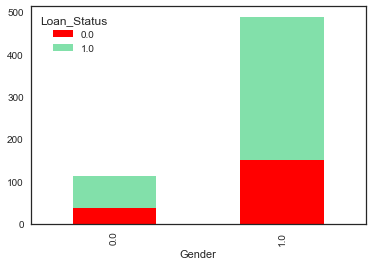

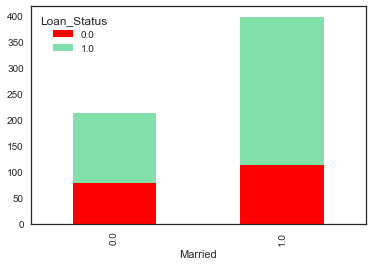

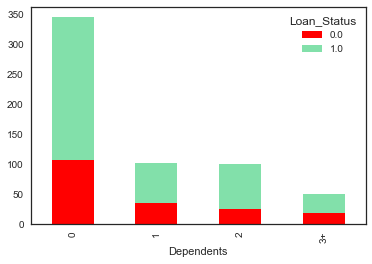

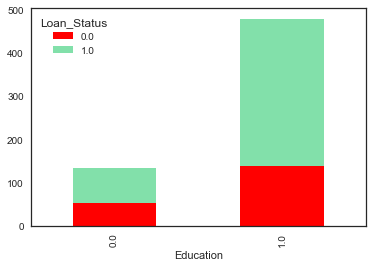

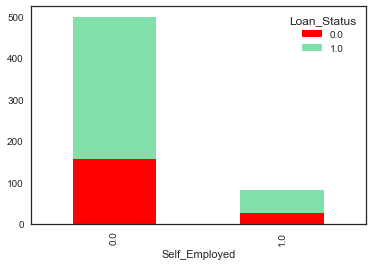

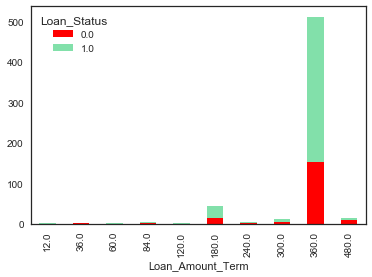

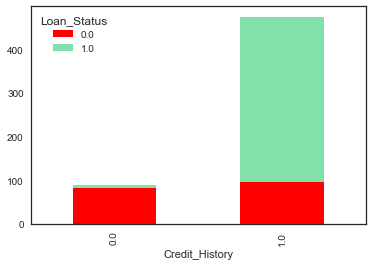

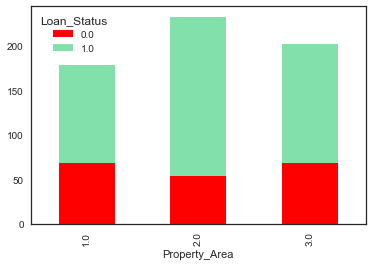

In [22]:
# And probably of getting a loan approved based on all categories individually,
# visualized a little more nicely as stacked barplots
try:
    for col in categ_cols:
        pair = pd.crosstab(df[col], df['Loan_Status'])
        pair.plot.bar(stacked=True, color=['red', '#82E0AA'])
        plt.show()
except (ValueError, KeyError) as e:
    pass

Notes:  
* Gender - many more male applicants  
* Married - married applicants have a better record. Considering the gender gap,  
  let's remember to look at the relationship between Gender and Married.  
* Dependents - Keep in mind that 3+ includes more than just applicants with 3 dependents.  
* Education - As noted before, perhaps correlated with income, etc.  
* Loan_Amount_Term - Overwhelmingly 1-year terms. We'll look at cleaning up the few  
  outliers below 3 months.  
* Credit_History - Unsurprisingly linked with Loan_Status; may also be linked to Married, etc.
* Property_Area - SemiUrban looking good for probability of approval. I'm thinking married applicants    
  with decent income moving to the suburbs  

  -----  
### Cleaning up the Data  
  

So now that we have a clearer picture of what our data look like, it's time to start tidying.  
This includes, for starters, dealing with missing values and outliers

In [23]:
# Just as a reminder:
df.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

For **categorical variables** we'll impute missing values by the mode,  
assuming we don't find any specific reasons not too.

In [24]:
# Check our modes just in case:
for col in categ_cols:
    print(df[col].name, '\n', df[col].mode())

Gender 
 0    1.0
dtype: float64
Married 
 0    1.0
dtype: float64
Dependents 
 0    0
dtype: object
Education 
 0    1.0
dtype: float64
Self_Employed 
 0    0.0
dtype: float64
Loan_Amount_Term 
 0    360.0
dtype: float64
Credit_History 
 0    1.0
dtype: float64
Property_Area 
 0    2.0
dtype: float64
Loan_Status 
 0    1.0
dtype: float64


OK so I feel comfortable imputing by the mode for the above  
variables EXCEPT for Gender, Married, Credit_History and Loan_Status (our outcome variable).  
Luckily in this dataset there are relatively few missing values in each column.  
  

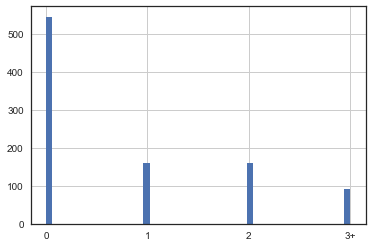

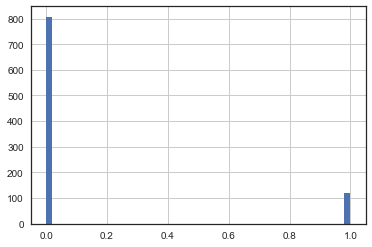

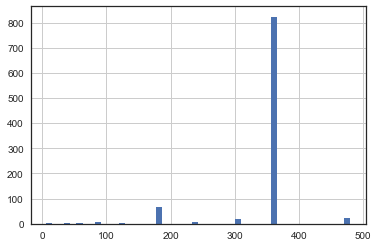

In [25]:
# Just to quickly show one more time the distributions of variables 
# we'll impute by the mode for:
df['Dependents'].hist(bins=50)
plt.show()
df['Self_Employed'].hist(bins=50)
plt.show()
df['Loan_Amount_Term'].hist(bins=50)
plt.show()

  
Even checking the distribution of dependents grouped by Married, Gender, and Property Area  
returns a mode of 0 for every single possible grouping:

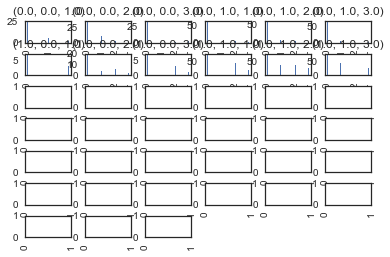

In [26]:
df['Dependents'].hist(bins=50, by=[df['Married'], df['Gender'], df['Property_Area']])
plt.show()

In [27]:
# So impute by mode for Dependents, Self_Employed, Loan_Amount_Term:
mode_cols = ['Dependents', 'Self_Employed', 'Loan_Amount_Term']
for col in mode_cols:
    df[col].fillna(df[col].mode().iloc[0], inplace=True)
print(df.isnull().sum())

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents             0
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed          0
source                 0
dtype: int64


In [28]:
# For Gender I'm going to look at marital status again
married_tf = df.Married == 1
print(df.pivot_table(index='Gender', columns=married_tf, values='Loan_ID', aggfunc='count'))
# Proportions:
df.pivot_table(index='Gender', columns=married_tf, values='Loan_ID', aggfunc='count').apply(lambda x: x / df.Loan_ID.count())

Married  False  True 
Gender               
0.0        125     57
1.0        214    561


Married,False,True
Gender,,
0.0,0.127421,0.058104
1.0,0.218145,0.571865


So it turns out that male applicants are much more likely to be married  
than female applicants. In fact, female applicants are more likely to not  
be married.  
We can use this information to impute the missing values in Gender  
(and likewise to impute the missing values in Married, even though there  
are only 3.. but why not be thorough)  

In [29]:
print(df.Gender.isnull().sum(), ' . ', df.Married.isnull().sum())
df.loc[((df.Married == 1.0) & (df.Gender.isnull())), 'Gender'] = 1.0
df.loc[((df.Married == 0.0) & (df.Gender.isnull())), 'Gender'] = 0.0

df.loc[((df.Gender == 1.0) & (df.Married.isnull())), 'Married'] = 1.0
df.loc[((df.Gender == 0.0) & (df.Married.isnull())), 'Married'] = 0.0
print(df.Gender.isnull().sum(), ' . ', df.Married.isnull().sum())

24  .  3
0  .  0


As for **Credit_History**, this is a very important variable in determining Loan_Status,  
so even though you may reason that a NaN value might mean no credit history,  
we can't take that chance (especially since the mode for Credit_History is  
overwhelmingly '1.0').  

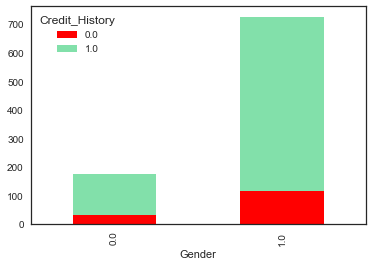

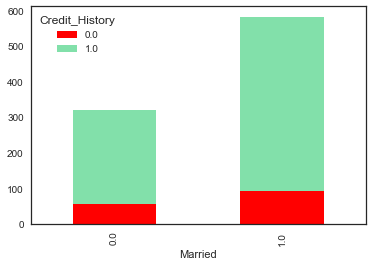

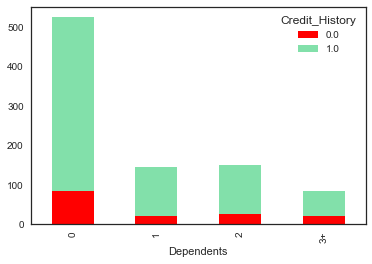

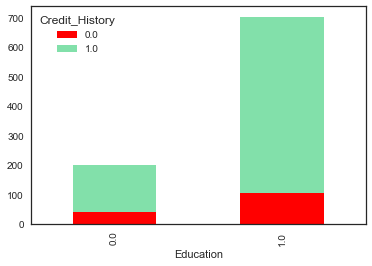

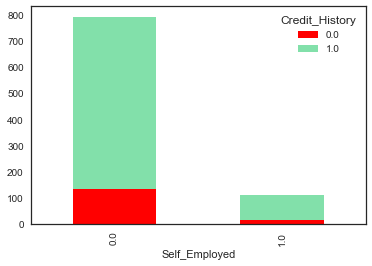

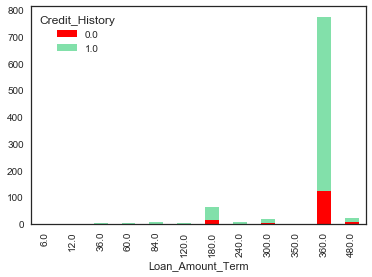

In [30]:
try:
    for col in categ_cols:
        pair = pd.crosstab(df[col], df['Credit_History'])
        pair.plot.bar(stacked=True, color=['red', '#82E0AA'])
        plt.show()
except (ValueError, KeyError) as e:
    pass

Unfortunately, Credit_History doesn't show a strong correlation with any variables  
apart from Loan_Status.  
As such, rather than miscategorize these applicants, we'll put them in a new category of their own:  

In [31]:
df['Credit_History'] = df['Credit_History'].replace(np.nan, 2.0)
pd.value_counts(df.Credit_History.isnull())

False    981
Name: Credit_History, dtype: int64

  -----  
Next we'll move on to dealing with the numeric variables, starting with LoanAmount.  
  
### LoanAmount nulls    

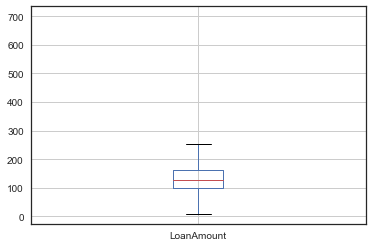

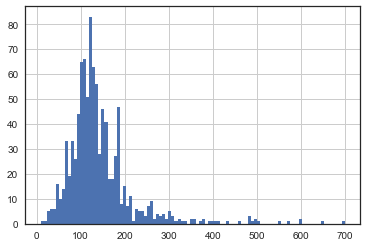

In [32]:
df.boxplot(column='LoanAmount')
plt.show()
df['LoanAmount'].hist(bins=100)
plt.show()

I think for LoanAmount we'll go ahead and train a model to  
predict and replace missing values, based on other variables in the data.  

In [33]:
# Import KNeighborsRegressor from scikit-learn
from sklearn.neighbors import KNeighborsRegressor

# Divide into train and test sets
is_test = np.random.rand(len(df)) > 0.70
train_la = df[is_test==False]
test_la = df[is_test==True]

# Set up imputer with sklearn's KNeighbors
la_imp = KNeighborsRegressor(n_neighbors=1)

# Prepare to train based on whether or not LoanAmount is null
train_vals = train_la[train_la.LoanAmount.isnull()==False]
train_nulls = train_la[train_la.LoanAmount.isnull()==True]

# Check for correlated variables to use in our model
train_vals.corr()

,ApplicantIncome,CoapplicantIncome,Credit_History,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
ApplicantIncome,1.000000,-0.104061,0.029435,0.146234,0.022902,0.533675,-0.026431,0.052900,0.037449,0.044801,0.118556
CoapplicantIncome,-0.104061,1.000000,-0.005832,0.063859,0.144743,0.176290,-0.005991,-0.055747,0.092153,-0.026060,-0.009136
Credit_History,0.029435,-0.005832,1.000000,0.029365,-0.014129,0.018716,-0.013887,0.425052,0.013922,0.017380,0.050339
Education,0.146234,0.063859,0.029365,1.000000,-0.048417,0.165456,0.012789,0.066554,-0.022019,0.066610,0.016710
Gender,0.022902,0.144743,-0.014129,-0.048417,1.000000,0.083968,-0.072189,0.007778,0.393425,-0.046656,0.024782
LoanAmount,0.533675,0.176290,0.018716,0.165456,0.083968,1.000000,0.077575,-0.012795,0.177702,-0.032653,0.086840
Loan_Amount_Term,-0.026431,-0.005991,-0.013887,0.012789,-0.072189,0.077575,1.000000,-0.022916,-0.037613,-0.006971,-0.014613
Loan_Status,0.052900,-0.055747,0.425052,0.066554,0.007778,-0.012795,-0.022916,1.000000,0.084327,0.054450,0.039607
Married,0.037449,0.092153,0.013922,-0.022019,0.393425,0.177702,-0.037613,0.084327,1.000000,0.003696,0.019391
Property_Area,0.044801,-0.026060,0.017380,0.066610,-0.046656,-0.032653,-0.006971,0.054450,0.003696,1.000000,-0.060435


In [34]:
# Correlations with LoanAmount
train_vals.corr().iloc[:,5]

ApplicantIncome      0.533675
CoapplicantIncome    0.176290
Credit_History       0.018716
Education            0.165456
Gender               0.083968
LoanAmount           1.000000
Loan_Amount_Term     0.077575
Loan_Status         -0.012795
Married              0.177702
Property_Area       -0.032653
Self_Employed        0.086840
Name: LoanAmount, dtype: float64

**ApplicantIncome** looking promising..  
Also, **CoapplicantIncome, Education, Married** and **Self_Employed** may be good to include.  

In [35]:
# Fit model based on the above variables 
cols = ['ApplicantIncome', 'Education', 'Married', 'Self_Employed']
la_imp.fit(train_vals[cols], train_vals.LoanAmount)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [36]:
# Predict LoanAmount where LoanAmount is null with the training set
new_vals = la_imp.predict(train_nulls.loc[:, cols])
new_vals

array([ 116.,   99.,  125.,  187.,  280.,  194.,   70.,  113.,   80.,
        100.,   95.,  214.,   59.,   70.,  137.,  104.,  115.,  113.,
         90.,  150.,  412.])

In [37]:
# Add predicted values to train_nulls and confirm absence of missing values
train_nulls['LoanAmount'] = new_vals
pd.value_counts(train_nulls.LoanAmount.isnull())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    21
Name: LoanAmount, dtype: int64

In [38]:
# recombine the data
print(len(train_la))
train_la = train_vals.append(train_nulls)
len(train_la)

703


703

In [39]:
# Apply our model to the test set
new_vals2 = la_imp.predict(test_la.loc[:, cols])
test_la.loc[:, 'LoanAmount_Imputed'] = new_vals2
test_la.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source,LoanAmount_Imputed
2,3000,0.0,1.0,0,1.0,1.0,66.0,360.0,LP001005,1.0,1.0,3.0,1.0,train,56.0
4,6000,0.0,1.0,0,1.0,1.0,141.0,360.0,LP001008,1.0,0.0,3.0,0.0,train,156.0
10,3200,700.0,1.0,2,1.0,1.0,70.0,360.0,LP001024,1.0,1.0,3.0,0.0,train,172.0
11,2500,1840.0,1.0,2,1.0,1.0,109.0,360.0,LP001027,1.0,1.0,3.0,0.0,train,120.0
24,3717,2925.0,2.0,1,1.0,1.0,151.0,360.0,LP001052,0.0,1.0,2.0,0.0,train,120.0


In [40]:
# Replace null LoanAmount values with values from LoanAmount_Imputed
test_la.loc[test_la.LoanAmount.isnull(), 'LoanAmount'] = test_la['LoanAmount_Imputed'] 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
# Confirm absence of nulls in train and test sets
print(pd.value_counts(train_la.LoanAmount.isnull()))
print(pd.value_counts(test_la.LoanAmount.isnull()))

False    703
Name: LoanAmount, dtype: int64
False    278
Name: LoanAmount, dtype: int64


In [42]:
# And recombine train/test back into df
df = pd.concat([train_la, test_la])
print(pd.value_counts(df.LoanAmount.isnull()))
df.head()

False    981
Name: LoanAmount, dtype: int64


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,LoanAmount_Imputed,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
1,4583,1508.0,1.0,1,1.0,1.0,128.0,NaN,360.0,LP001003,0.0,1.0,1.0,0.0,train
3,2583,2358.0,1.0,0,0.0,1.0,120.0,NaN,360.0,LP001006,1.0,1.0,3.0,0.0,train
5,5417,4196.0,1.0,2,1.0,1.0,267.0,NaN,360.0,LP001011,1.0,1.0,3.0,1.0,train
6,2333,1516.0,1.0,0,0.0,1.0,95.0,NaN,360.0,LP001013,1.0,1.0,3.0,0.0,train
7,3036,2504.0,0.0,3+,1.0,1.0,158.0,NaN,360.0,LP001014,0.0,1.0,2.0,0.0,train


In [43]:
# Remove unnecessary LoanAmount_Imputed column
df.drop('LoanAmount_Imputed', axis=1, inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
1,4583,1508.0,1.0,1,1.0,1.0,128.0,360.0,LP001003,0.0,1.0,1.0,0.0,train
3,2583,2358.0,1.0,0,0.0,1.0,120.0,360.0,LP001006,1.0,1.0,3.0,0.0,train
5,5417,4196.0,1.0,2,1.0,1.0,267.0,360.0,LP001011,1.0,1.0,3.0,1.0,train
6,2333,1516.0,1.0,0,0.0,1.0,95.0,360.0,LP001013,1.0,1.0,3.0,0.0,train
7,3036,2504.0,0.0,3+,1.0,1.0,158.0,360.0,LP001014,0.0,1.0,2.0,0.0,train


#### *Okay* so we've gotten rid of our missing values:  

In [44]:
df.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
dtype: int64

  -----  
##### Our next step is to deal with odd and/or extreme values for our for numeric variables  

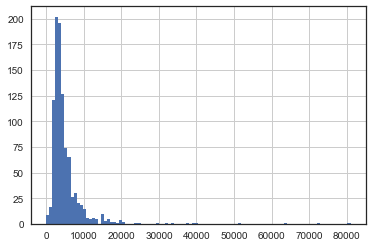

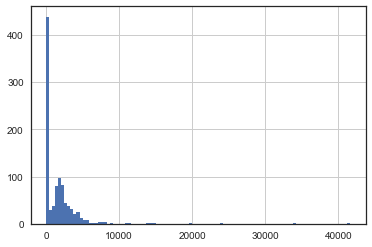

In [45]:
# Let's start by looking at the ApplicantIncome and CoapplicantIncome distributions again
df['ApplicantIncome'].hist(bins=100)
plt.show()
df['CoapplicantIncome'].hist(bins=100)
plt.show()

In [46]:
# Find any 0 values in ApplicantIncome (could be errors, or income is with coapplicant)
print(df.loc[df.ApplicantIncome == 0])

     ApplicantIncome  CoapplicantIncome  Credit_History Dependents  Education  \
639                0            24000.0             0.0          0        1.0   
730                0             1760.0             1.0          0        0.0   

     Gender  LoanAmount  Loan_Amount_Term   Loan_ID  Loan_Status  Married  \
639     1.0       148.0             360.0  LP001153          NaN      0.0   
730     0.0       180.0             360.0  LP001607          NaN      0.0   

     Property_Area  Self_Employed source  
639            1.0            0.0   test  
730            2.0            0.0   test  


So we have just two culprits, both with coapplicant incomes recorded.  
The thing is I was thinking of *combining ApplicantIncome and CoapplicantIncome* for all  
rows anyway.  
  
If CoapplicantIncome is 0 then ApplicantIncome represents total income,  
and otherwise Coapplicant gets added to the total. I think it's safe to say that  
Coapplicant Income is often an extension of Applicant Income for loan applicants anyway.  

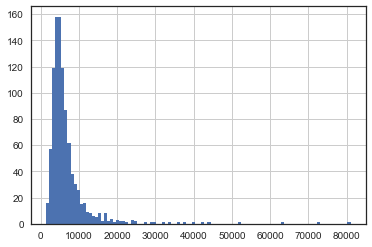

In [47]:
# So we'll create a new variable 'TotalIncome' and also try out its log transformation
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float) # just for consistency
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'].hist(bins=100)
plt.show()

Of course this is still wildly skewed to the right, so let's try to  
take the **log** of this **TotalIncome** variable.  
  
We decided that the outliers are likely still natural values in our data,   
so it would be wise to normalize this a bit instead of removing high incomes.  

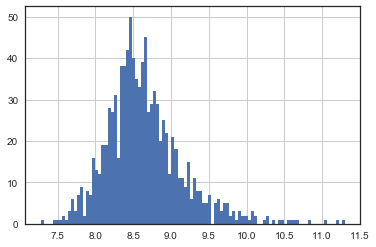

In [48]:
# Try a logarithmic transformation:
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=100)
plt.show()

*Not perfect, but this looks a lot better!*

  -----  
##### OK next we'll move on to another numeric variable: LoanAmount  

In [49]:
# Check for 0 values:
print(df.loc[df.LoanAmount == 0])

Empty DataFrame
Columns: [ApplicantIncome, CoapplicantIncome, Credit_History, Dependents, Education, Gender, LoanAmount, Loan_Amount_Term, Loan_ID, Loan_Status, Married, Property_Area, Self_Employed, source, TotalIncome, TotalIncome_log]
Index: []


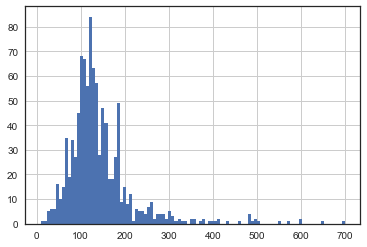

In [50]:
# Good to know. Look at the distribution one more time:
df['LoanAmount'].hist(bins=100)
plt.show()

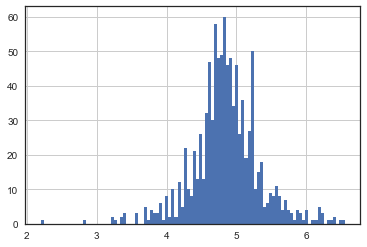

In [51]:
# As noted early on, we do have a moderate skew.
# We can probably transfrom with numpy's log method again.
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=100)
plt.show()

OK so now we can feel pretty good about the variables we have at the moment.  
We can also consider developing new metrics if there's anything that  
seems promising.  
  
For example, maybe the **ratio** of TotalIncome to LoanAmount could give us an   
idea of a given applicant's capacity to pay back their loan.  

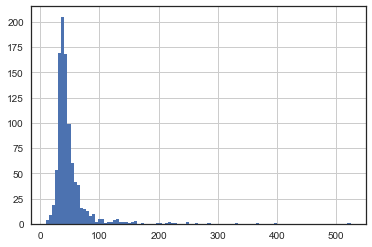

In [52]:
df['IncomeLoanAmount_Ratio'] = df['TotalIncome'] / df['LoanAmount']
df['IncomeLoanAmount_Ratio'].hist(bins=100)
plt.show()

Another skewed distribution.  
Not surprising at all given that we have some high-income applicants  
with comparatively low loan amounts.  

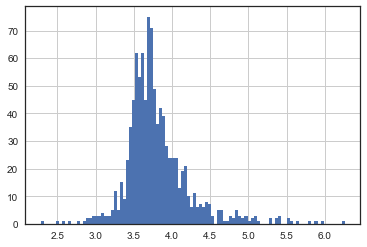

In [53]:
df['IARatio_log'] = np.log(df['IncomeLoanAmount_Ratio'])
df['IARatio_log'].hist(bins=100)
plt.show()

We could also consider taking the *ratio of term length to amount*,  
under the assumption that small loans with longer terms are more likely to be  
paid back than larger loans with shorter terms.  

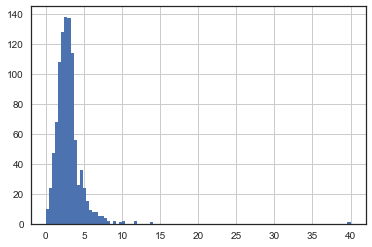

In [54]:
df['AmountTerm_Ratio'] = df['Loan_Amount_Term'] / df['LoanAmount']
df['AmountTerm_Ratio'].hist(bins=100)
plt.show()

This distribution isn't really that skewed. It looks like there's  
maybe just one value way out to the right.  

In [55]:
print(df[df['AmountTerm_Ratio'] > 15])

     ApplicantIncome  CoapplicantIncome  Credit_History Dependents  Education  \
568           2378.0                0.0             1.0          0        1.0   

     Gender  LoanAmount  Loan_Amount_Term   Loan_ID  Loan_Status  Married  \
568     0.0         9.0             360.0  LP002840          0.0      0.0   

     Property_Area  Self_Employed source  TotalIncome  TotalIncome_log  \
568            3.0            0.0  train       2378.0         7.774015   

     LoanAmount_log  IncomeLoanAmount_Ratio  IARatio_log  AmountTerm_Ratio  
568        2.197225              264.222222      5.57679              40.0  


Yeah so this instance is actually this dataset's minimum LoanAmount of 9.0.  
I think we can safely remove this as an outlier in AmountTermRatio.  

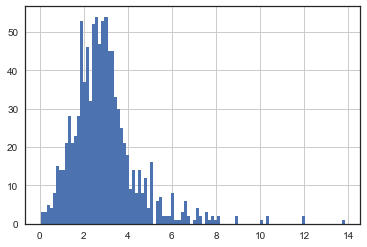

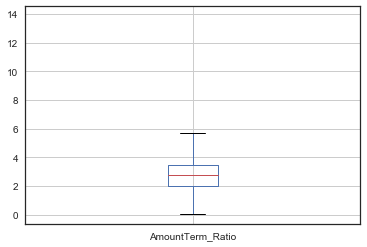

In [56]:
df.loc[df['AmountTerm_Ratio'] == 40.0, 'AmountTerm_Ratio'] = df['AmountTerm_Ratio'].median()
df['AmountTerm_Ratio'].hist(bins=100)
plt.show()
df.boxplot(column='AmountTerm_Ratio')
plt.show()

This looks a bit better. We'll leave the other outliers in for now and  
see how everything looks once we train our overall model.  

  -----  
##### OK so we've done some analysis and cleaning.
##### Now we're ready to move on to modelling

In [57]:
# Reconfirm which values we still need to make numeric for sklearn
df.dtypes

ApplicantIncome           float64
CoapplicantIncome         float64
Credit_History            float64
Dependents                 object
Education                 float64
Gender                    float64
LoanAmount                float64
Loan_Amount_Term          float64
Loan_ID                    object
Loan_Status               float64
Married                   float64
Property_Area             float64
Self_Employed             float64
source                     object
TotalIncome               float64
TotalIncome_log           float64
LoanAmount_log            float64
IncomeLoanAmount_Ratio    float64
IARatio_log               float64
AmountTerm_Ratio          float64
dtype: object

**Dependents** needs to be recoded, **Loan_ID** is our ID column,  
**source** we'll get rid of shortly when we split back to train and test sets.  

In [58]:
# And actually Dependents is easy enough to recode manually, so
# the way we've done it there's no need here for LabelEncoding
df['Dependents'] = df['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
print(df.Dependents.dtype)

int64


Great. So next we'll split the data back into train and test sets on 'source',  
and drop Loan_Status from the test set.

In [59]:
# Split data back into train and test sets on 'source'
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']
train.drop(['source'], axis=1, inplace=True)
test.drop(['source', 'Loan_Status'], axis=1, inplace=True)
train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,TotalIncome,TotalIncome_log,LoanAmount_log,IncomeLoanAmount_Ratio,IARatio_log,AmountTerm_Ratio
1,4583.0,1508.0,1.0,1,1.0,1.0,128.0,360.0,LP001003,0.0,1.0,1.0,0.0,6091.0,8.714568,4.852030,47.585938,3.862537,2.812500
3,2583.0,2358.0,1.0,0,0.0,1.0,120.0,360.0,LP001006,1.0,1.0,3.0,0.0,4941.0,8.505323,4.787492,41.175000,3.717831,3.000000
5,5417.0,4196.0,1.0,2,1.0,1.0,267.0,360.0,LP001011,1.0,1.0,3.0,1.0,9613.0,9.170872,5.587249,36.003745,3.583623,1.348315
6,2333.0,1516.0,1.0,0,0.0,1.0,95.0,360.0,LP001013,1.0,1.0,3.0,0.0,3849.0,8.255569,4.553877,40.515789,3.701692,3.789474
7,3036.0,2504.0,0.0,3,1.0,1.0,158.0,360.0,LP001014,0.0,1.0,2.0,0.0,5540.0,8.619750,5.062595,35.063291,3.557155,2.278481


In [60]:
test.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Married,Property_Area,Self_Employed,TotalIncome,TotalIncome_log,LoanAmount_log,IncomeLoanAmount_Ratio,IARatio_log,AmountTerm_Ratio
616,5000.0,1800.0,1.0,2,1.0,1.0,208.0,360.0,LP001031,1.0,3.0,0.0,6800.0,8.824678,5.337538,32.692308,3.487140,1.730769
617,2340.0,2546.0,2.0,2,1.0,1.0,100.0,360.0,LP001035,1.0,3.0,0.0,4886.0,8.494129,4.605170,48.860000,3.888959,3.600000
619,2165.0,3422.0,1.0,0,0.0,1.0,152.0,360.0,LP001054,1.0,3.0,1.0,5587.0,8.628198,5.023881,36.756579,3.604317,2.368421
620,2226.0,0.0,1.0,1,0.0,0.0,59.0,360.0,LP001055,0.0,2.0,0.0,2226.0,7.707962,4.077537,37.728814,3.630424,6.101695
621,3881.0,0.0,0.0,2,0.0,1.0,147.0,360.0,LP001056,1.0,1.0,0.0,3881.0,8.263848,4.990433,26.401361,3.273416,2.448980


In [61]:
# Write new train and test sets to csv files
train.to_csv("train_new.csv", index=False)
test.to_csv("test_new.csv", index=False)

In [62]:
# We won't need the Loan_ID column for our classification models
train1 = train.drop('Loan_ID', axis=1)
test1 = test.drop('Loan_ID', axis=1)

  -----  
  ### KNN Classification

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# target
y = train1.Loan_Status.values
# features
X = train1.drop('Loan_Status', axis=1).values

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 63)
#y_train = y_train.ravel()
#y_test = y_test.ravel()

knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [64]:
y_pred = knn.predict(X_test)
print('KNN Accuracy\n')
for K in range(25):
 K_value = K+1
 knn = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 knn.fit(X_train, y_train) 
 y_pred = knn.predict(X_test)
 print('Accuracy is ', accuracy_score(y_test,y_pred)*100, '% for K-Value:', K_value)

KNN Accuracy

Accuracy is  53.5135135135 % for K-Value: 1
Accuracy is  46.4864864865 % for K-Value: 2
Accuracy is  58.3783783784 % for K-Value: 3
Accuracy is  53.5135135135 % for K-Value: 4
Accuracy is  61.6216216216 % for K-Value: 5
Accuracy is  55.1351351351 % for K-Value: 6
Accuracy is  59.4594594595 % for K-Value: 7
Accuracy is  60.0 % for K-Value: 8
Accuracy is  64.8648648649 % for K-Value: 9
Accuracy is  64.8648648649 % for K-Value: 10
Accuracy is  65.4054054054 % for K-Value: 11
Accuracy is  64.8648648649 % for K-Value: 12
Accuracy is  64.8648648649 % for K-Value: 13
Accuracy is  65.9459459459 % for K-Value: 14
Accuracy is  64.3243243243 % for K-Value: 15
Accuracy is  65.9459459459 % for K-Value: 16
Accuracy is  65.4054054054 % for K-Value: 17
Accuracy is  67.027027027 % for K-Value: 18
Accuracy is  66.4864864865 % for K-Value: 19
Accuracy is  66.4864864865 % for K-Value: 20
Accuracy is  65.9459459459 % for K-Value: 21
Accuracy is  65.9459459459 % for K-Value: 22
Accuracy is  65

  -----  
  ### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

score = logreg.score(X_test, y_test)
print('Logistic Regression on all \n Accuracy is ', score*100, '%')

Logistic Regression on all 
 Accuracy is  77.2972972973 %


  -----  
  ### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

score = dt.score(X_test, y_test)
print('Decision Tree on * \n Accuracy is ', score*100, '%')

Decision Tree on * 
 Accuracy is  69.1891891892 %


  -----  
  ### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
print('Random Forest on * \n Accuracy is ', score*100, '%')

Random Forest on * 
 Accuracy is  81.0810810811 %


In [68]:
# In a function for quick fitting and prediction:
def run_classification(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print(model_name, 'on * \n Accuracy is', score*100, '%')

In [69]:
run_classification(rf, 'RandomForest')
run_classification(dt, 'DecisionTree')
run_classification(logreg, 'LogisticRegression')

RandomForest on * 
 Accuracy is 80.0 %
DecisionTree on * 
 Accuracy is 69.1891891892 %
LogisticRegression on * 
 Accuracy is 77.2972972973 %


  -----  
*Quick note here.*  
Scikit Learn is very convenient in that different models take the same methods (fit, predict, etc.), so actually you can create a function that fits, predicts, and scores models all at once when passed the model to use, the predictor variables (X), and the outcome variable (y).  
It's a more efficient way to check a number of classification models quickly to find the best one for your dataset.  
Above I am fitting, predicting, and scoring each model individually merely for the sake of practice, and in order to fully display all steps for the sake of creating an educational presentation of my data analysis.  
  
Who knows though, perhaps I'll change it to make it short later on...  

[Edit] *In fact, yes*, let's experiment with this function (below) in order to cross-check our models to ward off overfitting mistakes, and also so that we can efficiently try out a number of combinations of explanatory variables interactively, merely by modifying the arguments to the general classification function.  
The following is based on a similar function from the Analytics Vidhya website (the host of this data classification contest).  

In [72]:
from sklearn.cross_validation import KFold

def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [73]:
# So now we can simply do this:
model = rf
predictors = train1.columns.values
outcome = 'Loan_Status'
classification_model(model, train1, predictors, outcome)

# Display series of feature importances:
featimp = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print('\nFeature Importances:\n', featimp)

Accuracy : 100.000%
Cross-Validation Score : 100.000%

Feature Importances:
 Loan_Status               0.661360
Credit_History            0.145783
IncomeLoanAmount_Ratio    0.026735
IARatio_log               0.026580
TotalIncome_log           0.020357
TotalIncome               0.020344
ApplicantIncome           0.020127
LoanAmount                0.015382
LoanAmount_log            0.013976
CoapplicantIncome         0.012284
AmountTerm_Ratio          0.012154
Property_Area             0.006087
Married                   0.004720
Dependents                0.004329
Loan_Amount_Term          0.003763
Education                 0.002869
Gender                    0.001748
Self_Employed             0.001403
dtype: float64


And then pick and choose features to include in order to reduce overfitting.  
It turns out the features we created ourselves show up as some of the most  
influential in our model, after credit history.  

In [74]:
# Fit random forest on specific variables
model = rf
predictors = ['Credit_History', 'IARatio_log', 'IncomeLoanAmount_Ratio', 'TotalIncome_log']
outcome = 'Loan_Status'
classification_model(model, train1, predictors, outcome)
# Display series of feature importances:
featimp = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print('\nFeature Importances:\n', featimp)

Accuracy : 100.000%
Cross-Validation Score : 77.370%

Feature Importances:
 Credit_History            0.304533
TotalIncome_log           0.244473
IARatio_log               0.226488
IncomeLoanAmount_Ratio    0.224506
dtype: float64


In [75]:
# Try decision tree, here with a slightly different set of features
model = dt
predictors = ['Credit_History', 'Gender', 'Married', 'Education']
outcome = 'Loan_Status'
classification_model(model, train1, predictors, outcome)

Accuracy : 81.270%
Cross-Validation Score : 81.113%


In [76]:
# Or check logistic regression with the variables below
model = logreg
predictors = ['Credit_History', 'TotalIncome_log', 'IncomeLoanAmount_Ratio']
outcome = 'Loan_Status'
classification_model(model, train1, predictors, outcome)

Accuracy : 80.945%
Cross-Validation Score : 80.949%


###### After testing a number of combinations, ~81% accuracy is what we tend to be getting with these models.  
###### Also, the relatively simple logistic regression model is doing just as well.  
###### Overfitting proves to be a major factor in these kinds of classification sets,  
###### so often the simplest models work best in terms of predicting new data